In [1]:
# 40epoches해서도 안되면 다시 model7으로 가는거야

In [2]:
%ls

'2,3peak mix.ipynb'                    amp.csv
'5peak 3 para when it worksss.ipynb'   center.csv
'Fitting_with_noise (1).ipynb'         graph.csv
 ITO_O1s_bg.txt                        labels.png
 ITO_O1s_exp.txt                       model.png
 ITO_O1s_fitting.txt                   model_shapes.png
 ITO_O1s_p1.txt                        peak_number.csv
 ITO_O1s_p2.txt                        width.csv
 ITO_O1s_p3.txt                       '논문 수정.ipynb'
 P3HT_S2p_bg.txt                      '데이터 얻기.ipynb'
 P3HT_S2p_exp.txt                     '저장된 데이터로 학습하기.ipynb'
 P3HT_S2p_fitting.txt                 '저장된 데이터로 학습하기10.ipynb'
 P3HT_S2p_p1.txt                      '저장된 데이터로 학습하기11.ipynb'
 P3HT_S2p_p2.txt                      '저장된 데이터로 학습하기2.ipynb'
 PeakDetection.ipynb                  '저장된 데이터로 학습하기3.ipynb'
 Untitled.ipynb                       '저장된 데이터로 학습하기4.ipynb'
 Untitled1.ipynb                      '저장된 데이터로 학습하기5.ipynb'
 Untitled2.ipynb                      '저장된 데이터로 학습하기6.ipynb'
 

In [3]:
import pandas as pd
import numpy as np

In [4]:
graph = pd.read_csv('graph.csv').values[:,1:]
center= pd.read_csv('center.csv').values[:,1:]
width= pd.read_csv('width.csv').values[:,1:]
amp= pd.read_csv('amp.csv').values[:,1:]
peak_number= pd.read_csv('peak_number.csv').values[:,1:]

In [5]:
peak_number=peak_number.reshape(2000000,)

In [6]:
print(center[0:10])
print(width[0:10])
print(amp[0:10])
print(peak_number[0:10])
print(center.shape)
print(width.shape)
print(amp.shape)
print(peak_number.shape)
print(graph.shape)
print(graph)

[[ 0.          6.08688456 11.0810396 ]
 [ 5.07493349  8.25999368 11.36195096]
 [ 0.          2.67516221 10.60419171]
 [ 0.          5.54053864 12.23836258]
 [ 0.          4.08422309  7.21849474]
 [ 0.          7.30192691 12.34014272]
 [ 0.          2.54016398  5.16493207]
 [ 0.          4.67819908  6.09299318]
 [ 4.90655934  5.13202252 10.34134357]
 [ 0.          5.36008602  5.98285268]]
[[0.         1.24062404 0.95374601]
 [0.60456503 0.35785198 1.1738216 ]
 [0.         1.17339162 1.12952083]
 [0.         0.81456259 0.81987822]
 [0.         0.81681444 1.70560007]
 [0.         0.32207246 0.75414831]
 [0.         0.30486538 1.895045  ]
 [0.         0.59293989 0.4647601 ]
 [1.46428848 1.12931752 1.8841104 ]
 [0.         1.00584571 1.33599321]]
[[0.         0.21158879 0.18180892]
 [0.11125957 0.85593768 0.31159992]
 [0.         0.59012228 0.71652582]
 [0.         1.00856931 0.70388527]
 [0.         0.94976759 0.16667863]
 [0.         0.43501787 0.93207997]
 [0.         0.8393851  0.570734

In [7]:
import matplotlib.pyplot as plt
x = np.linspace(0, 15, 401) 
def y(a,b,c,x):
    beta = 5.09791537e-01
    gamma = 4.41140472e-01
    y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
#     y = c*(b**2)/((x-a)**2+b**2)
    return y

<ipython-input-7-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-7-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-7-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-7-69a298250a73>:6: RuntimeWarning: invalid value encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipython-input-7-69a298250a73>:6: RuntimeWarning: divide by zero encountered in true_divide
  y = c * ( (0.7*np.exp(-np.log(2)*(x - a)**2 / (beta * b)**2)) + (0.3/(1 + (x - a)**2 / (gamma * b)**2)))
<ipytho

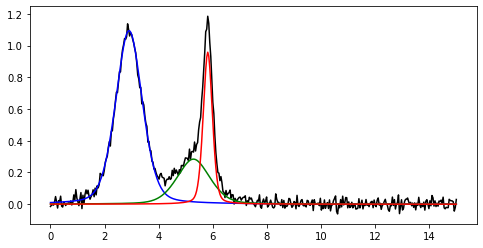

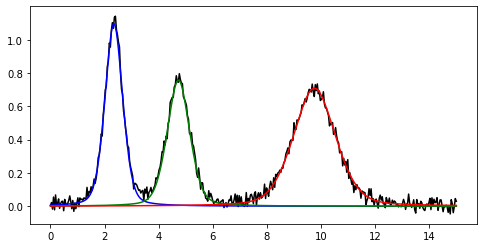

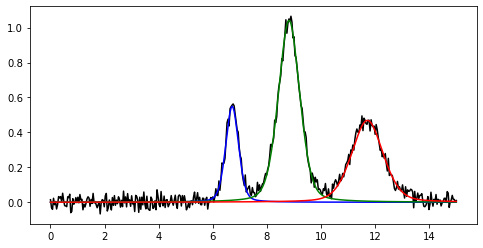

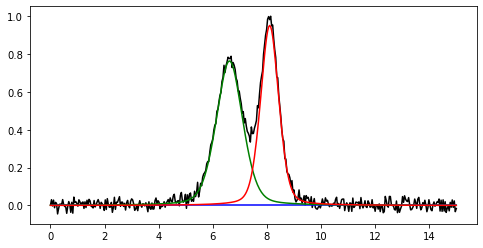

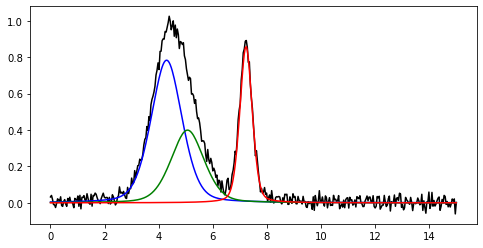

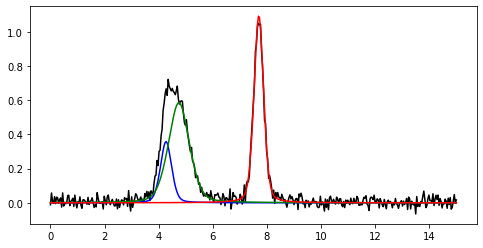

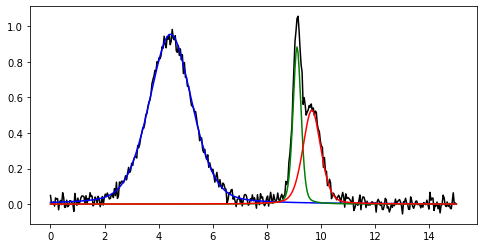

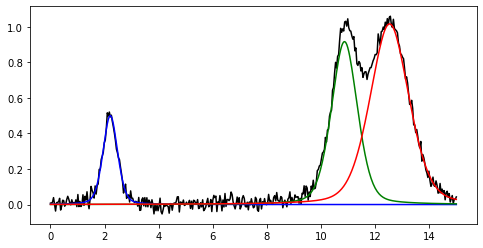

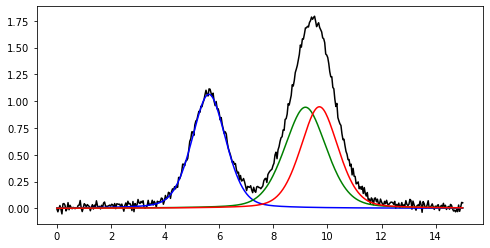

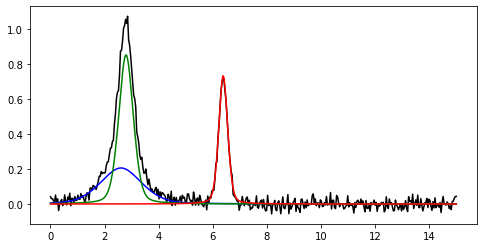

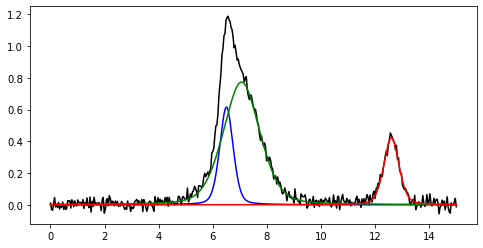

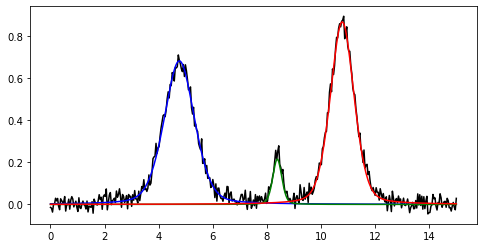

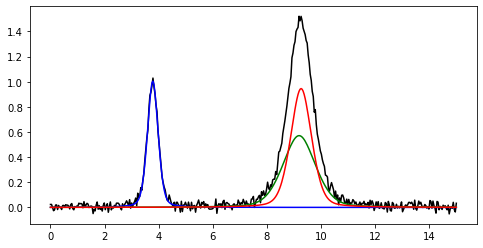

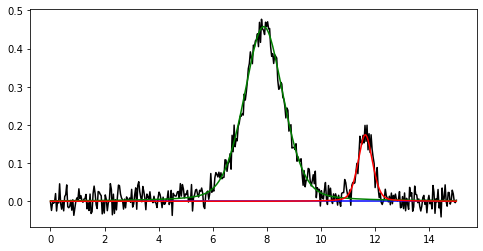

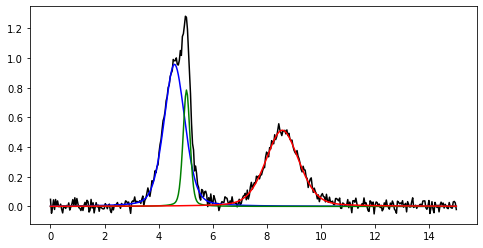

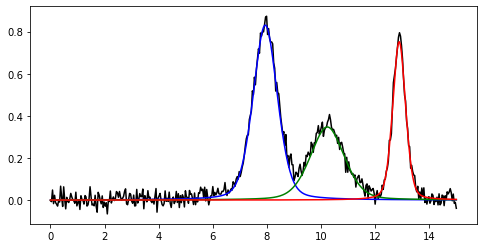

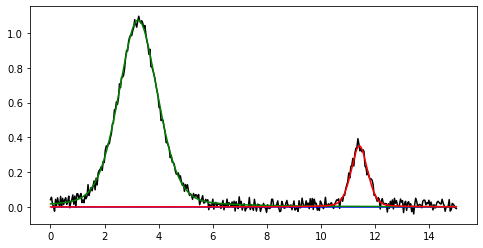

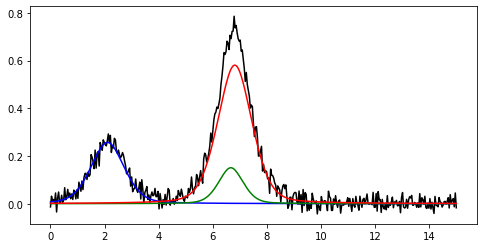

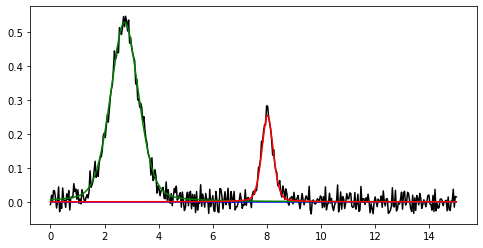

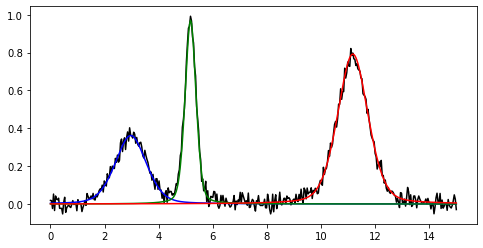

In [8]:
for i in range(20,40):
    plt.figure(figsize = (8,4))
    plt.plot(x,graph[i],color = 'black')
    plt.plot(x,y(center[i][0],width[i][0],amp[i][0],x), color = 'blue')
    plt.plot(x,y(center[i][1],width[i][1],amp[i][1],x), color= 'green')
    plt.plot(x,y(center[i][2],width[i][2],amp[i][2],x), color='red')

In [9]:
#90:9:1
data_number=1000000

train_graph = graph[:int(0.9*2*data_number)]
val_graph = graph[int(0.9*2*data_number):int(0.99*2*data_number)]
test_graph = graph[int(0.99*2*data_number):]

train_center = center[:int(0.9*2*data_number)]
val_center = center[int(0.9*2*data_number):int(0.99*2*data_number)]
test_center = center[int(0.99*2*data_number):]

train_width = width[:int(0.9*2*data_number)]
val_width = width[int(0.9*2*data_number):int(0.99*2*data_number)]
test_width = width[int(0.99*2*data_number):]

train_amp = amp[:int(0.9*2*data_number)]
val_amp = amp[int(0.9*2*data_number):int(0.99*2*data_number)]
test_amp = amp[int(0.99*2*data_number):]

train_peak_number = peak_number[:int(0.9*2*data_number)]
val_peak_number = peak_number[int(0.9*2*data_number):int(0.99*2*data_number)]
test_peak_number = peak_number[int(0.99*2*data_number):]

In [10]:
print(train_graph.shape, val_graph.shape, test_graph.shape)
print(train_center.shape, val_center.shape, test_center.shape)
print(train_width.shape, val_width.shape, test_width.shape)
print(train_amp.shape, val_amp.shape, test_amp.shape)
print(train_peak_number.shape, val_peak_number.shape, test_peak_number.shape)

(1800000, 401) (180000, 401) (20000, 401)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000, 3) (180000, 3) (20000, 3)
(1800000,) (180000,) (20000,)


In [11]:
# conv1d 쓰기 위해 reshape 사용 
# 1차원 그래프 변환

train_graph = train_graph.reshape(train_graph.shape[0],train_graph.shape[1],1)
val_graph = val_graph.reshape(val_graph.shape[0],val_graph.shape[1],1)
test_graph = test_graph.reshape(test_graph.shape[0],test_graph.shape[1],1)

print(train_graph.shape)
print(val_graph.shape)
print(test_graph.shape)

(1800000, 401, 1)
(180000, 401, 1)
(20000, 401, 1)


In [12]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input, Dense, Flatten, BatchNormalization
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import MaxPooling1D, GlobalMaxPooling1D
from keras.layers.merge import concatenate
from keras import layers

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 401, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 302, 128)     12928       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 151, 128)     0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 102, 128)     819328      max_pooling1d[0][0]              
______________________________________________________________________________________________

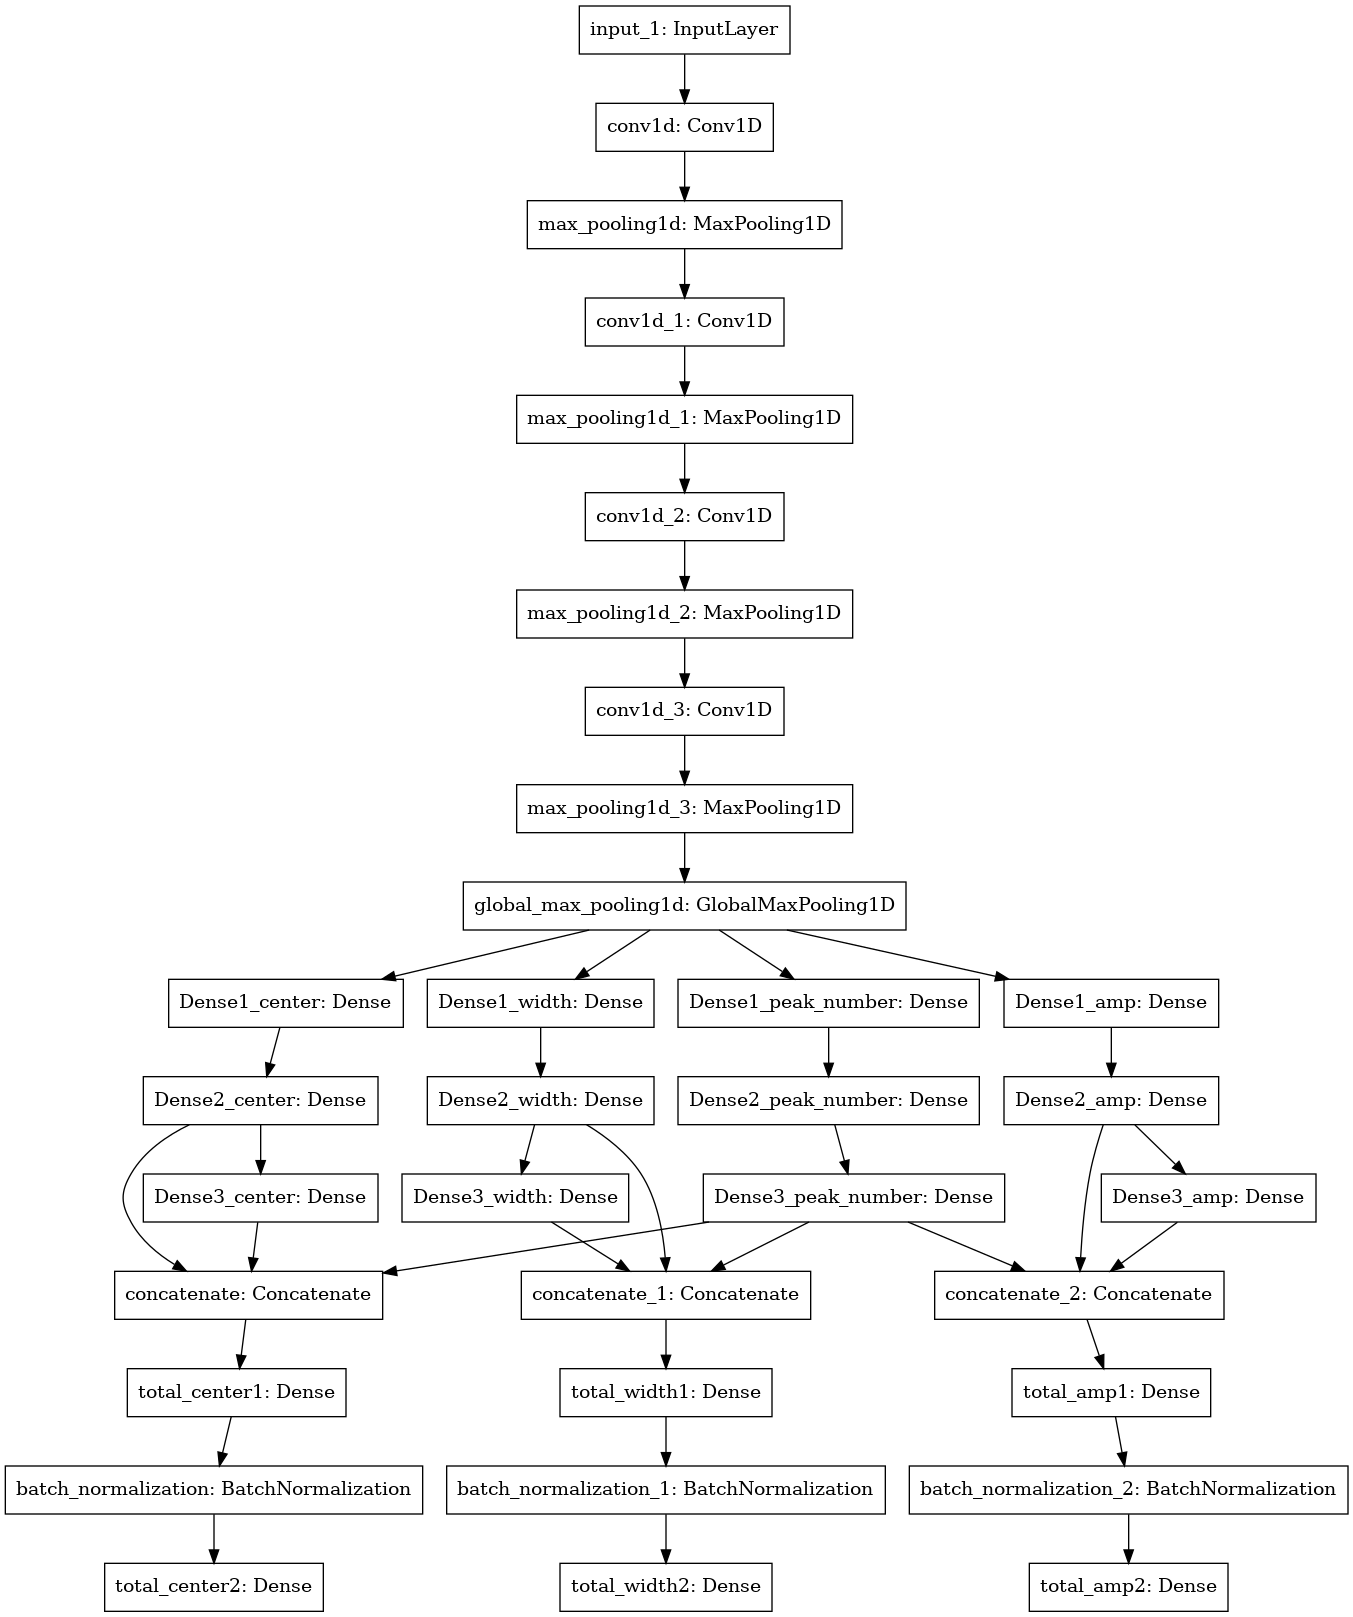

In [13]:

input_data = Input(shape = (len(x),1))
t = layers.Conv1D(128,100,activation = 'relu')(input_data)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,50,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(128,20,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)
t = layers.Conv1D(16,10,activation = 'relu')(t)
t = layers.MaxPooling1D(2)(t)

t = layers.GlobalMaxPooling1D()(t)

Dense1_peak_number = Dense(200, activation = 'relu',name='Dense1_peak_number')(t)
Dense2_peak_number = Dense(200, activation = 'relu',name = 'Dense2_peak_number')(Dense1_peak_number)
Dense3_peak_number = Dense(1, activation = 'linear',name = 'Dense3_peak_number')(Dense2_peak_number)


Dense1_center = Dense(200, activation = 'relu',name='Dense1_center')(t)
Dense2_center = Dense(100, activation = 'relu',name='Dense2_center')(Dense1_center)
Dense3_center = Dense(40, activation = 'relu',name='Dense3_center')(Dense2_center)
# output_center = Dense(3, activation = 'linear',name='output_center')(Dense3_center)

Dense1_width = Dense(200,activation = 'relu',name='Dense1_width')(t)
Dense2_width = Dense(100,activation = 'relu',name='Dense2_width')(Dense1_width)
Dense3_width = Dense(40,activation = 'relu',name='Dense3_width')(Dense2_width)
# output_width = Dense(3,activation = 'linear',name='output_width')(Dense3_width)

Dense1_amp = Dense(200,activation = 'relu',name='Dense1_amp')(t)
Dense2_amp = Dense(100,activation = 'relu',name='Dense2_amp')(Dense1_amp)
Dense3_amp = Dense(40,activation = 'relu',name='Dense3_amp')(Dense2_amp)
# output_amp = Dense(3,activation = 'linear',name='output_amp')(Dense3_amp)

center_merge = concatenate([Dense3_peak_number,Dense3_center,Dense2_center])
total_center1 = Dense(40, activation = 'relu',name = 'total_center1')(center_merge)
center_Batchnormalization  = BatchNormalization()(total_center1)
# total_center2 = Dense(40, activation = 'relu',name = 'total_center2')(total_center1)
total_center2 = Dense(3, activation = 'linear',name = 'total_center2')(center_Batchnormalization)


width_merge = concatenate([Dense3_peak_number,Dense3_width,Dense2_width])
total_width1 = Dense(40, activation = 'relu',name = 'total_width1')(width_merge)
width_Batchnormalization  = BatchNormalization()(total_width1)
# total_width2 = Dense(40, activation = 'relu',name = 'total_width2')(total_width1)
total_width2= Dense(3, activation = 'linear',name = 'total_width2')(width_Batchnormalization)


amp_merge = concatenate([Dense3_peak_number,Dense3_amp,Dense2_amp])
total_amp1 = Dense(40, activation = 'relu',name = 'total_amp1')(amp_merge)
amp_Batchnormalization  = BatchNormalization()(total_amp1)
# total_amp2 = Dense(40, activation = 'relu',name = 'total_amp2')(total_amp1)
total_amp2 = Dense(3, activation = 'linear',name = 'total_amp2')(amp_Batchnormalization)


model = Model(inputs = input_data,
              outputs = [Dense3_peak_number,total_center2,total_width2,total_amp2])
print(model.summary())
plot_model(model)

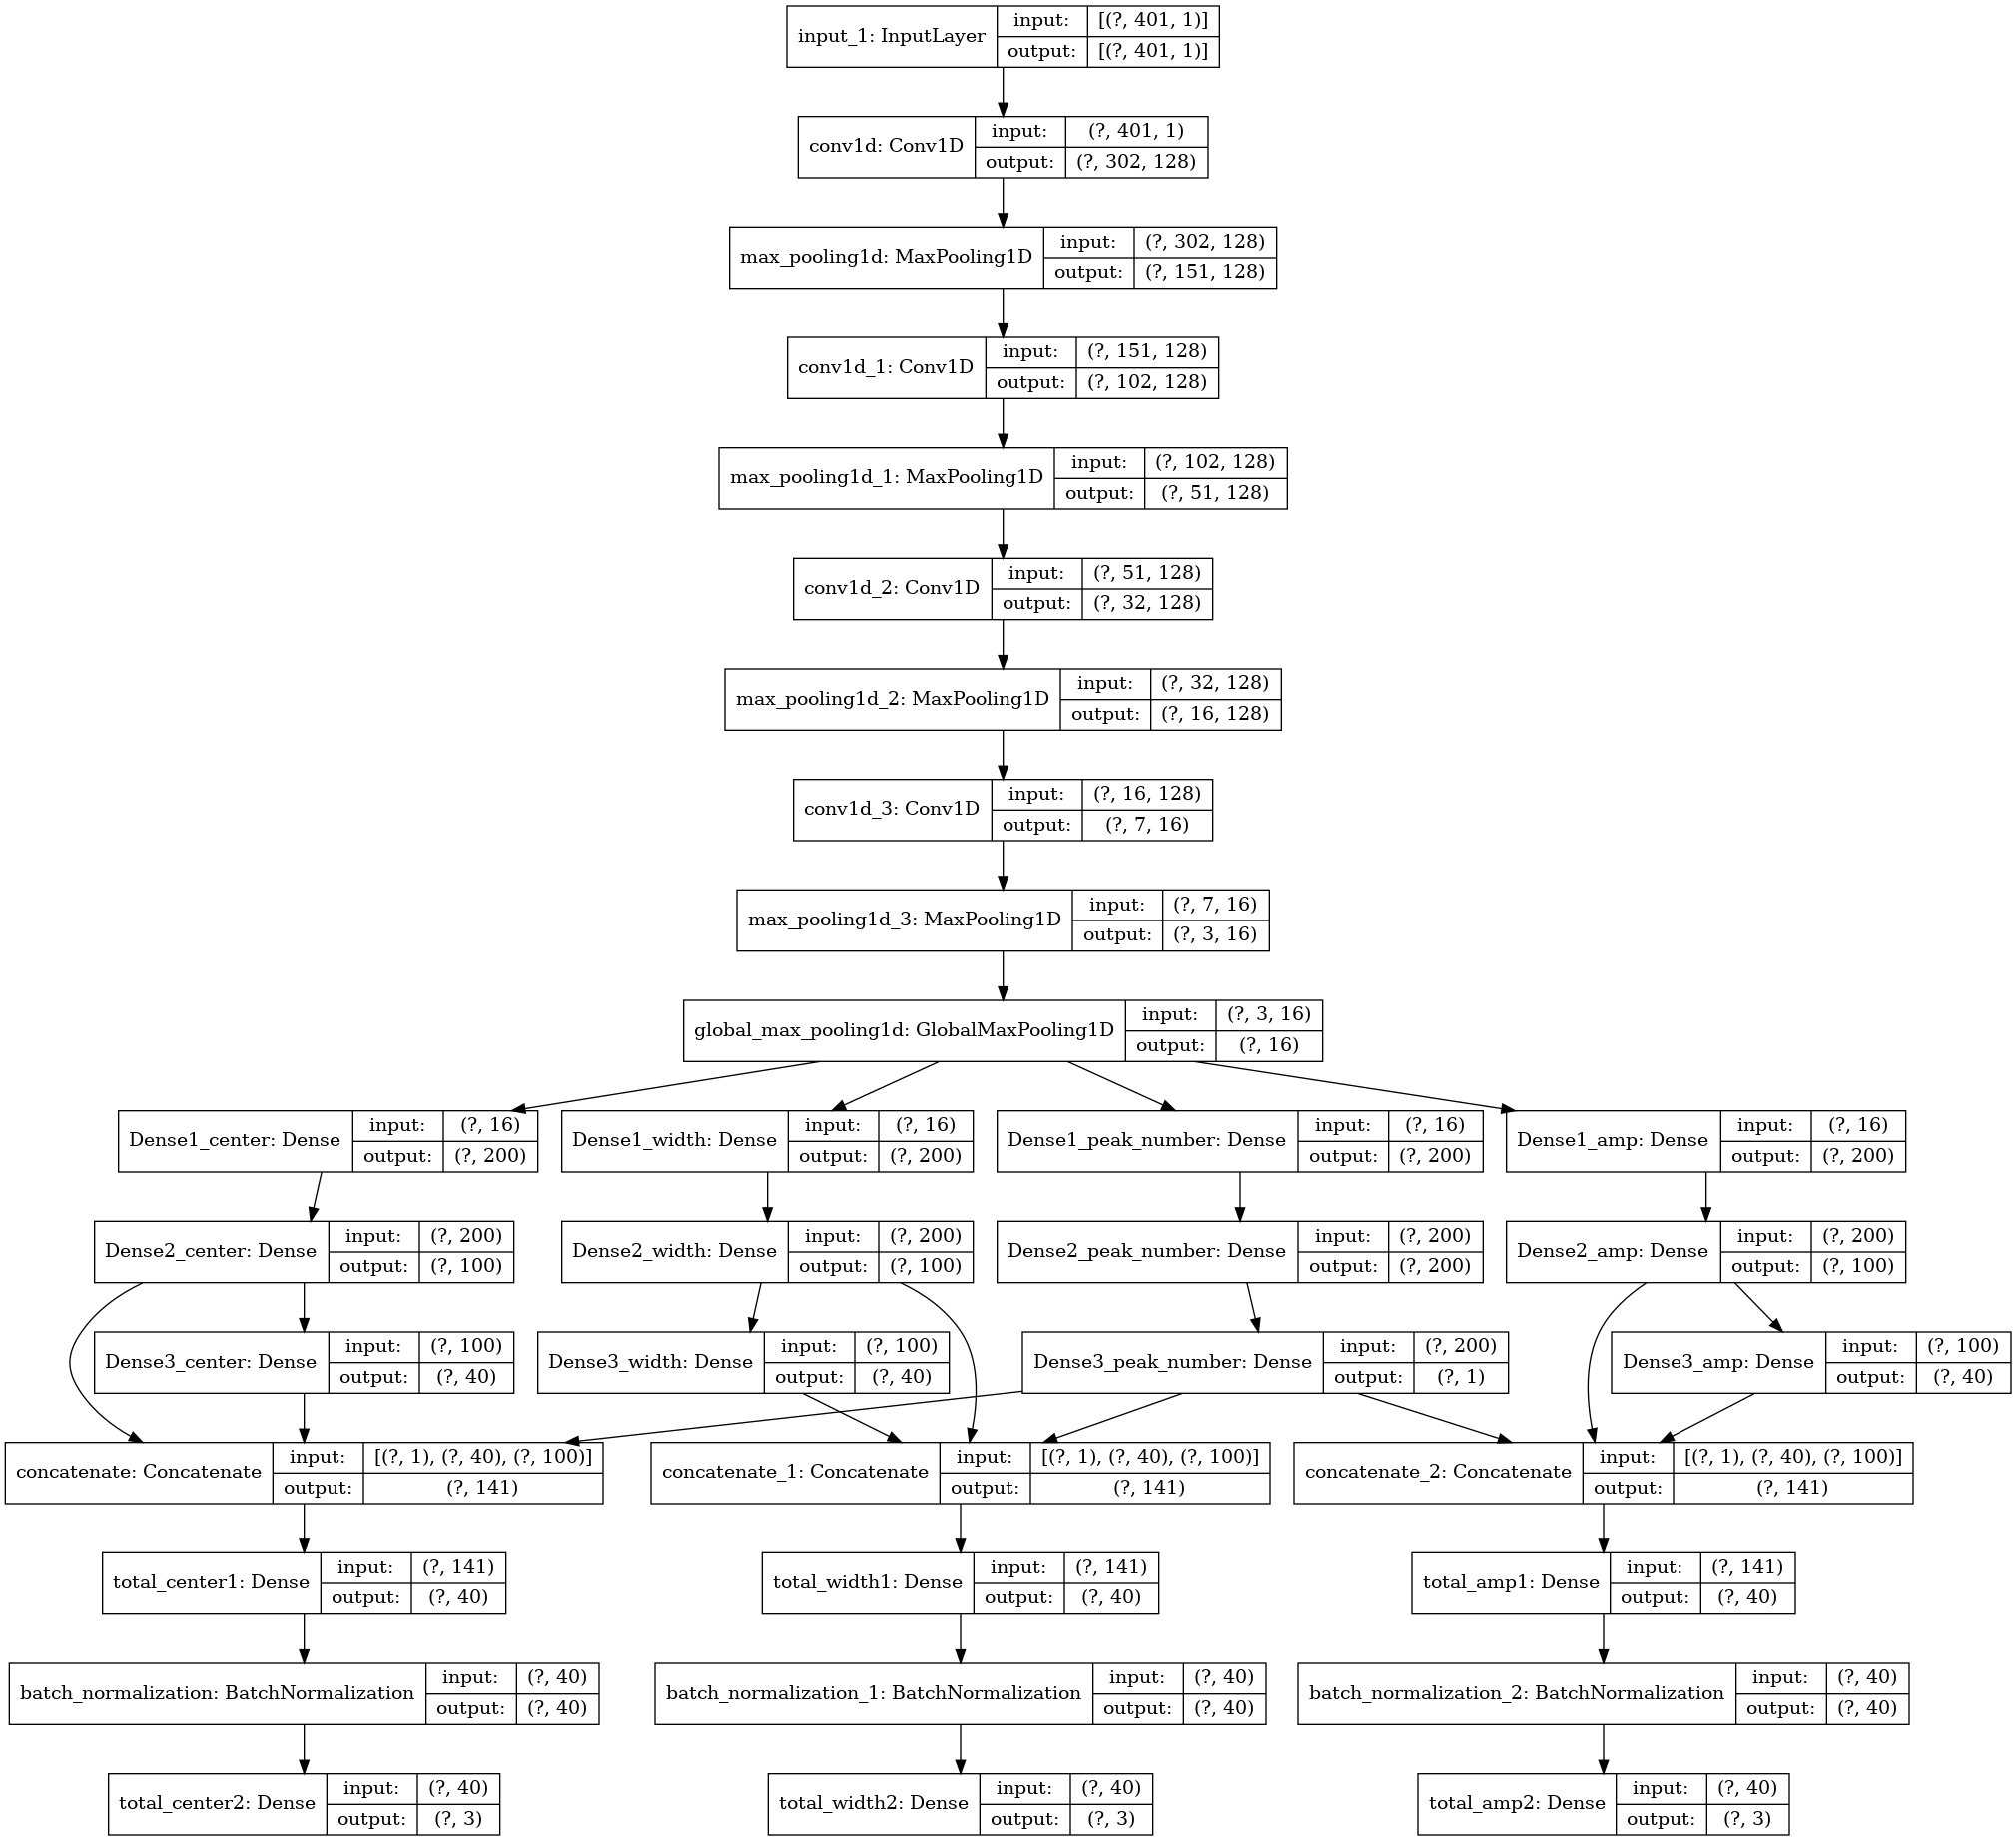

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file = 'labels.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)

In [15]:
model.compile(optimizer='adam',
              loss = {'total_center2' : 'mse',
                      'total_width2' : 'mse',
                      'total_amp2' : 'mse',
                      'Dense3_peak_number' : 'mse'},
#               loss_weights={'total_center3' : 0.5,
#                            'total_width3' : 1,
#                            'total_amp3' : 1,
#                             'Dense3_peak_number' :1 },
              metrics = ['mae'])

In [16]:
models=model.fit(train_graph, [train_peak_number,train_center , train_width, train_amp],
          epochs = 40,
          batch_size = 1000,
          validation_data = (val_graph, [val_peak_number, val_center, val_width, val_amp]))

Epoch 1/40
1800/1800 [==============================] - 96s 53ms/step - loss: 5.1580 - Dense3_peak_number_loss: 0.0751 - total_center2_loss: 4.9199 - total_width2_loss: 0.1124 - total_amp2_loss: 0.0506 - Dense3_peak_number_mae: 0.1588 - total_center2_mae: 1.0451 - total_width2_mae: 0.2278 - total_amp2_mae: 0.1685 - val_loss: 0.3587 - val_Dense3_peak_number_loss: 0.0135 - val_total_center2_loss: 0.2479 - val_total_width2_loss: 0.0597 - val_total_amp2_loss: 0.0376 - val_Dense3_peak_number_mae: 0.0610 - val_total_center2_mae: 0.2594 - val_total_width2_mae: 0.1739 - val_total_amp2_mae: 0.1462
Epoch 2/40
1800/1800 [==============================] - 97s 54ms/step - loss: 0.2965 - Dense3_peak_number_loss: 0.0100 - total_center2_loss: 0.2170 - total_width2_loss: 0.0420 - total_amp2_loss: 0.0275 - Dense3_peak_number_mae: 0.0469 - total_center2_mae: 0.2380 - total_width2_mae: 0.1362 - total_amp2_mae: 0.1202 - val_loss: 0.2354 - val_Dense3_peak_number_loss: 0.0062 - val_total_center2_loss: 0.1653

In [17]:
test_graph.shape

(20000, 401, 1)

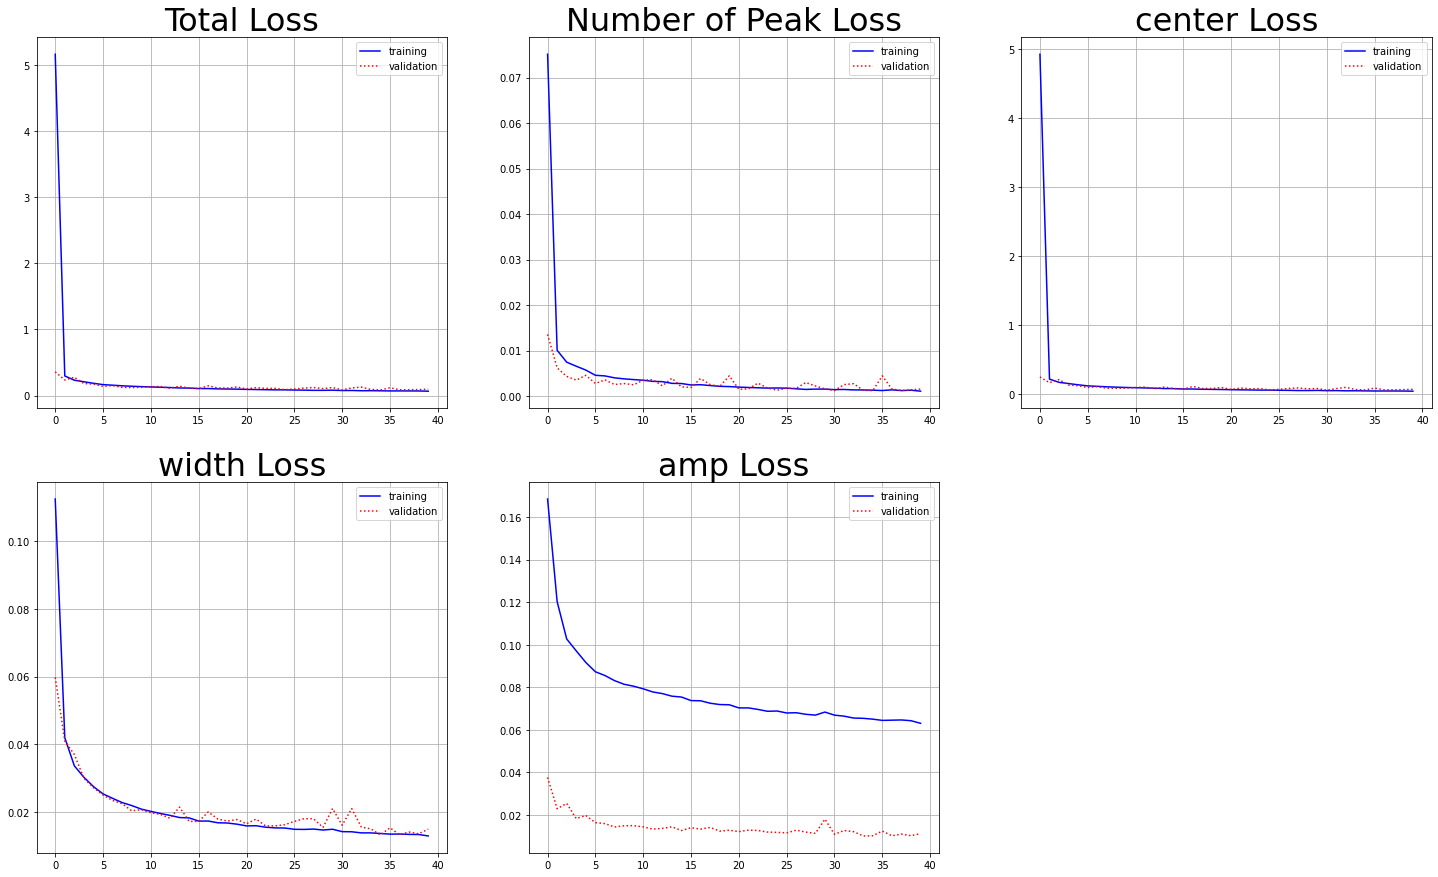

In [18]:
plt.figure(figsize = (25, 15))

plt.subplot(231)
plt.plot(models.history['loss'], 'b-', label = 'training')
plt.plot(models.history['val_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Total Loss", size = 32)
plt.legend()


plt.subplot(232)
plt.plot(models.history['Dense3_peak_number_loss'], 'b-', label = 'training')
plt.plot(models.history['val_Dense3_peak_number_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("Number of Peak Loss", size = 32)
plt.legend()

plt.subplot(233)
plt.plot(models.history['total_center2_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_center2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("center Loss", size = 32)
plt.legend()

plt.subplot(234)
plt.plot(models.history['total_width2_loss'], 'b-', label = 'training')
plt.plot(models.history['val_total_width2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("width Loss", size = 32)
plt.legend()

plt.subplot(235)
plt.plot(models.history['total_amp2_mae'], 'b-', label = 'training')
plt.plot(models.history['val_total_amp2_loss'], 'r:', label = 'validation')
plt.grid(True)
plt.title("amp Loss", size = 32)
plt.legend()


In [19]:
prediction = model.predict(test_graph)
print(len(prediction))

4


In [20]:
print(prediction[0].shape)
print(prediction[1].shape)# if center
print(prediction[2].shape)# width
print(prediction[3].shape)# amp

(20000, 1)
(20000, 3)
(20000, 3)
(20000, 3)


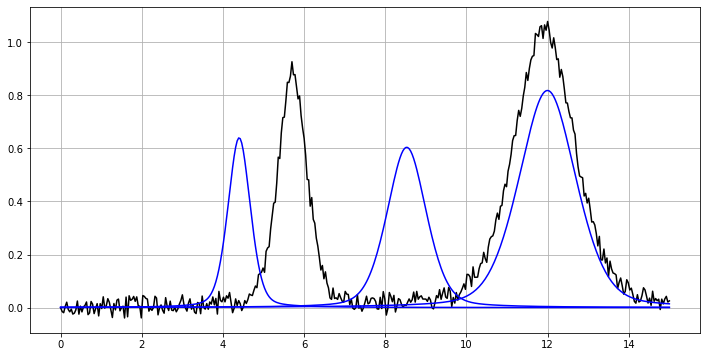

real_center   [ 0.          5.71315308 11.91923309]
predict_center [ 4.3988533 8.527917 11.996226 ]
---------------
real_width    [0.         0.84337558 1.79121459]
predict_center [ 0.6563025 1.1548476 1.6777802 ]
---------------
real_amp      [0.         0.88023975 1.04841723]
predict_center [ 0.6403259 0.60441494 0.8186305 ]


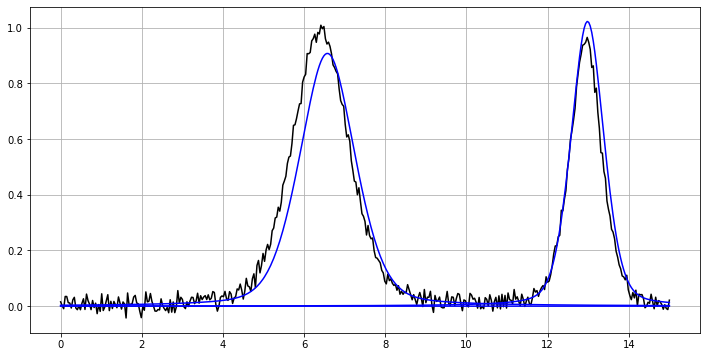

real_center   [ 0.          6.39994478 12.93951819]
predict_center [ 0.06095718 6.5739737 12.982707 ]
---------------
real_width    [0.         1.65652237 0.93438808]
predict_center [ 0.018742964 1.6304817 0.9661885 ]
---------------
real_amp      [0.         0.99348086 0.9478093 ]
predict_center [ 0.0042563826 0.9079372 1.0228457 ]


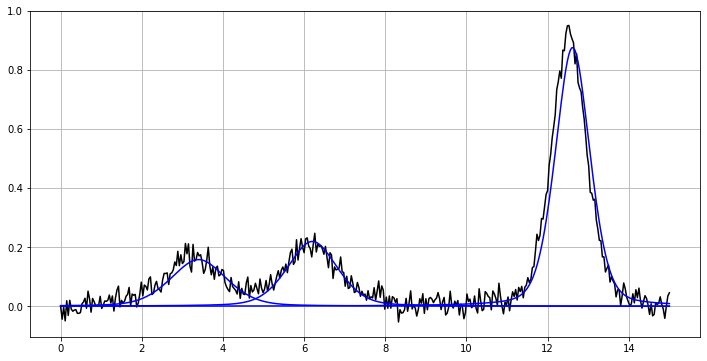

real_center   [ 3.23631434  6.18606995 12.52827948]
predict_center [ 3.399811 6.203694 12.616313 ]
---------------
real_width    [1.66278035 1.68069287 1.00126402]
predict_center [ 1.637789 1.4737794 1.0177165 ]
---------------
real_amp      [0.17531519 0.19742663 0.9243484 ]
predict_center [ 0.15790972 0.2192888 0.8760835 ]


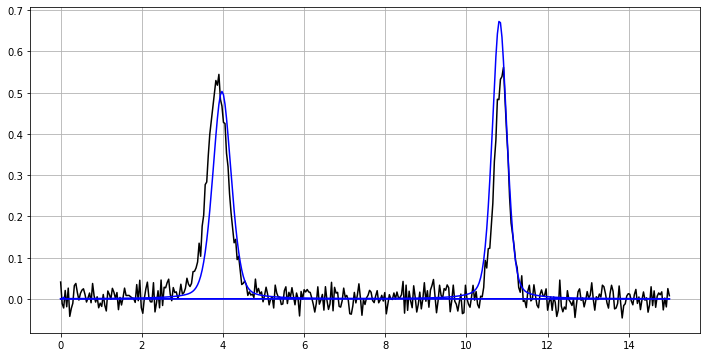

real_center   [ 0.          3.86715569 10.86221601]
predict_center [ 0.06467484 3.9751487 10.815505 ]
---------------
real_width    [0.         0.59165533 0.40581259]
predict_center [ 0.029572845 0.5426886 0.43429685 ]
---------------
real_amp      [0.         0.51955378 0.53934786]
predict_center [ 0.005358234 0.5031173 0.6757288 ]


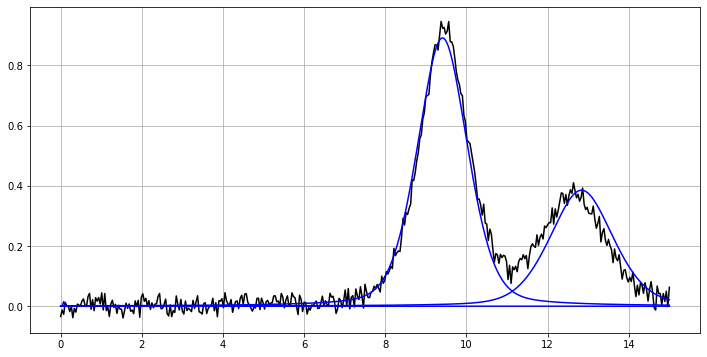

real_center   [ 0.          9.45233636 12.62868582]
predict_center [ 0.07391231 9.409638 12.835964 ]
---------------
real_width    [0.         1.44668865 1.87998592]
predict_center [ -0.015086904 1.473758 1.8540688 ]
---------------
real_amp      [0.         0.91245941 0.36050666]
predict_center [ 0.015512139 0.89149946 0.38539046 ]


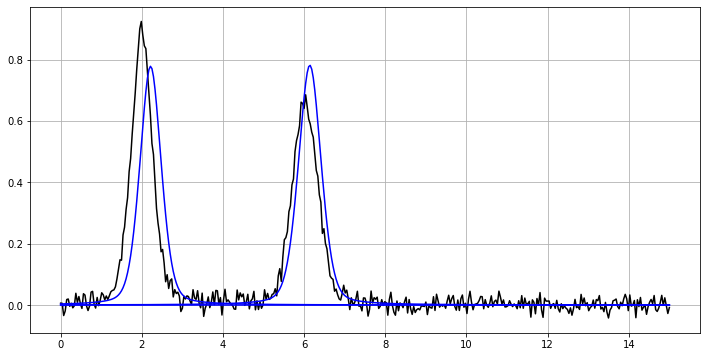

real_center   [0.         2.00332775 6.03248714]
predict_center [ 0.079684064 2.2158847 6.140529 ]
---------------
real_width    [0.         0.59737084 0.7272154 ]
predict_center [ 0.013036974 0.624514 0.66723084 ]
---------------
real_amp      [0.         0.90353073 0.66262424]
predict_center [ -0.0034885556 0.77826995 0.78159505 ]


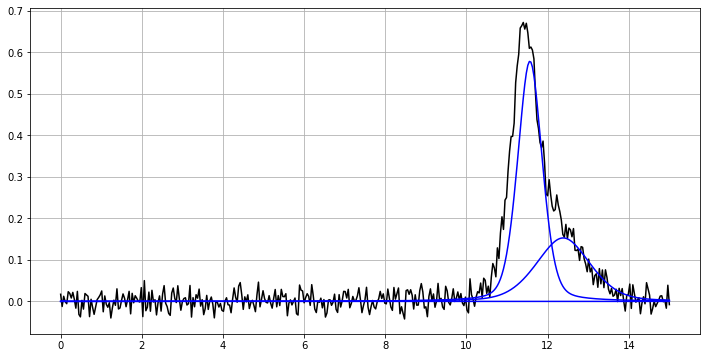

real_center   [ 0.         11.42268043 12.25882526]
predict_center [ 0.065129206 11.563811 12.383897 ]
---------------
real_width    [0.         0.75334379 1.47571775]
predict_center [ 0.0123499185 0.7179878 1.5788543 ]
---------------
real_amp      [0.         0.59638167 0.17278906]
predict_center [ 0.009940699 0.578334 0.15277936 ]


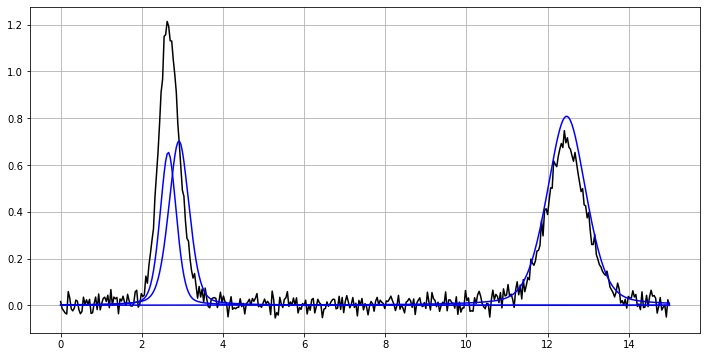

real_center   [ 2.57538501  2.73040878 12.45116549]
predict_center [ 2.6518762 2.915876 12.467912 ]
---------------
real_width    [0.41405293 0.60919744 1.12779081]
predict_center [ 0.47901785 0.5997883 1.1452982 ]
---------------
real_amp      [0.5085511  0.80758984 0.70893355]
predict_center [ 0.6543783 0.7028047 0.8084284 ]


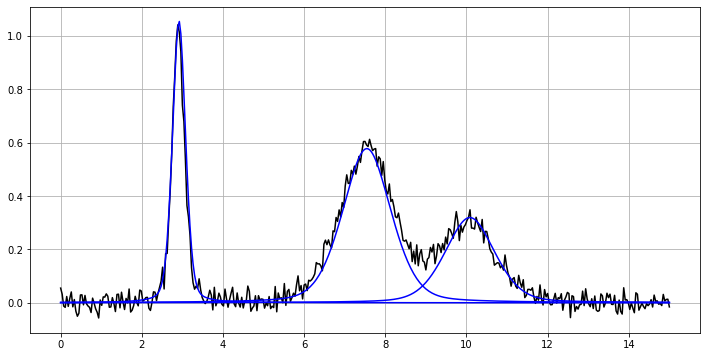

real_center   [ 2.9017155   7.54113871 10.03829508]
predict_center [ 2.9173806 7.545007 10.08458 ]
---------------
real_width    [0.3609779 1.5868491 1.5857514]
predict_center [ 0.38383192 1.4218338 1.4586079 ]
---------------
real_amp      [0.9967733  0.57811673 0.29408781]
predict_center [ 1.055078 0.57748204 0.31920147 ]


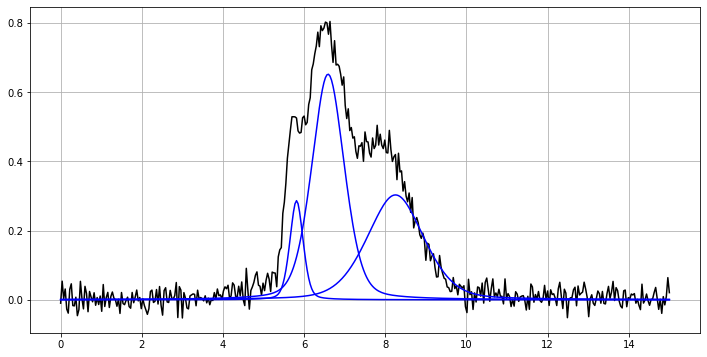

real_center   [5.70187413 6.47325447 7.95269075]
predict_center [ 5.812762 6.589625 8.250937 ]
---------------
real_width    [0.35270478 1.15793397 1.67777024]
predict_center [ 0.38955688 0.9574505 1.6641014 ]
---------------
real_amp      [0.28978847 0.72433166 0.41654231]
predict_center [ 0.28611854 0.6513219 0.30272195 ]


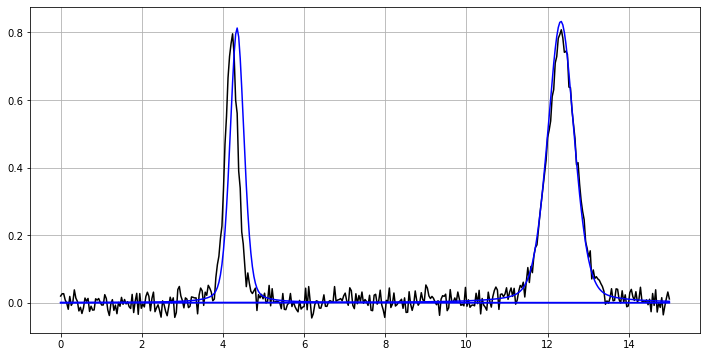

real_center   [ 0.          4.21687094 12.34120659]
predict_center [ 0.05926262 4.3465834 12.326349 ]
---------------
real_width    [0.         0.36773928 0.81390437]
predict_center [ 0.0064973086 0.41338605 0.7834464 ]
---------------
real_amp      [0.         0.78705796 0.79347587]
predict_center [ 0.008570746 0.8130438 0.83285373 ]


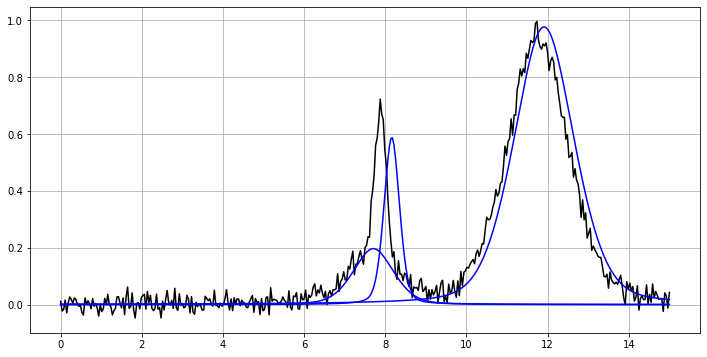

real_center   [ 7.64690374  7.88672447 11.75998207]
predict_center [ 7.7053404 8.159926 11.911651 ]
---------------
real_width    [1.57721792 0.35065511 1.76987164]
predict_center [ 1.1781176 0.45385733 1.7698486 ]
---------------
real_amp      [0.15874303 0.52349397 0.94926077]
predict_center [ 0.19679616 0.58878994 0.9769375 ]


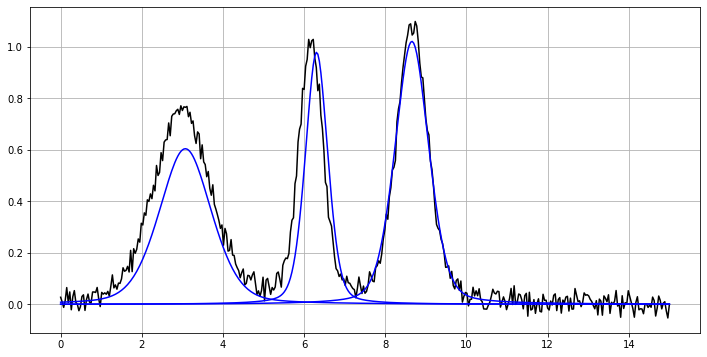

real_center   [2.97550177 6.17211837 8.66438667]
predict_center [ 3.0730164 6.3069863 8.655866 ]
---------------
real_width    [1.63453699 0.70265382 0.91474209]
predict_center [ 1.539392 0.6586845 0.9982646 ]
---------------
real_amp      [0.76022675 1.01366238 1.09569614]
predict_center [ 0.60413414 0.9785542 1.0207915 ]


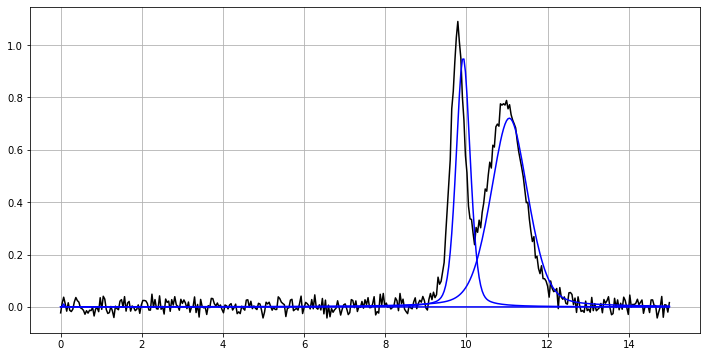

real_center   [ 0.          9.77946893 10.97017916]
predict_center [ 0.07033013 9.919509 11.056983 ]
---------------
real_width    [0.         0.39829634 1.05510464]
predict_center [ 0.037650317 0.41577917 1.0903797 ]
---------------
real_amp      [0.         1.01298834 0.78358955]
predict_center [ 0.011673346 0.9528002 0.7208648 ]


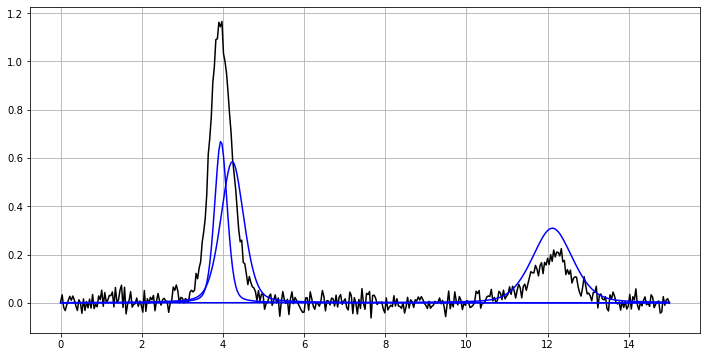

real_center   [ 3.8569353   4.12070216 12.11402843]
predict_center [ 3.9490204 4.2308273 12.116397 ]
---------------
real_width    [0.4981711  0.58429175 1.10961953]
predict_center [ 0.37268114 0.679773 1.1923715 ]
---------------
real_amp      [0.83741193 0.49685655 0.19540706]
predict_center [ 0.669815 0.5845851 0.30908668 ]


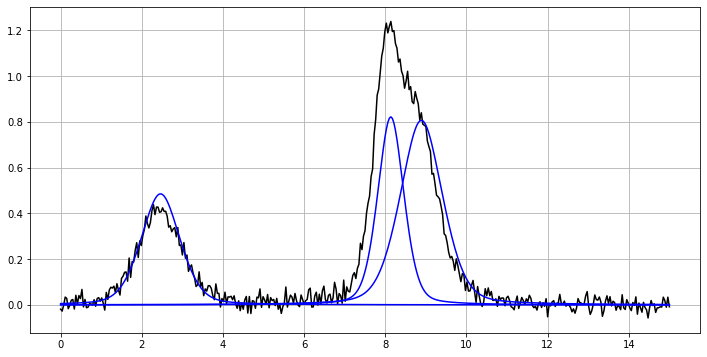

real_center   [2.4287244  8.00130851 8.73111697]
predict_center [ 2.4609962 8.135562 8.889338 ]
---------------
real_width    [1.30205305 0.73029477 1.26629847]
predict_center [ 1.1440208 0.76622117 1.2429132 ]
---------------
real_amp      [0.414536   0.85436318 0.82462015]
predict_center [ 0.48528916 0.821664 0.80645806 ]


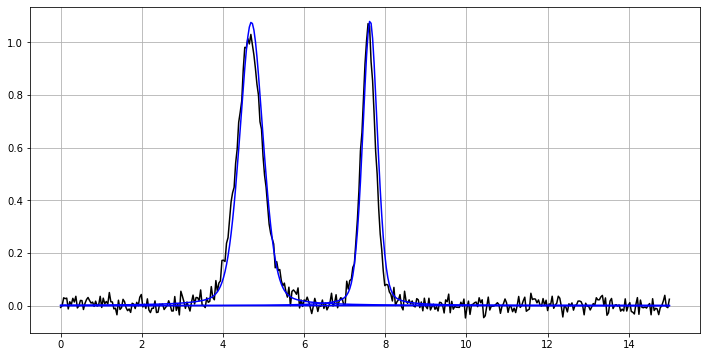

real_center   [0.         4.6604788  7.58096173]
predict_center [ 0.10189761 4.699516 7.6263347 ]
---------------
real_width    [0.         0.74087437 0.40953535]
predict_center [ 0.036082447 0.68933725 0.43693212 ]
---------------
real_amp      [0.         1.0195198  1.04926695]
predict_center [ 0.0020830482 1.0756462 1.0820107 ]


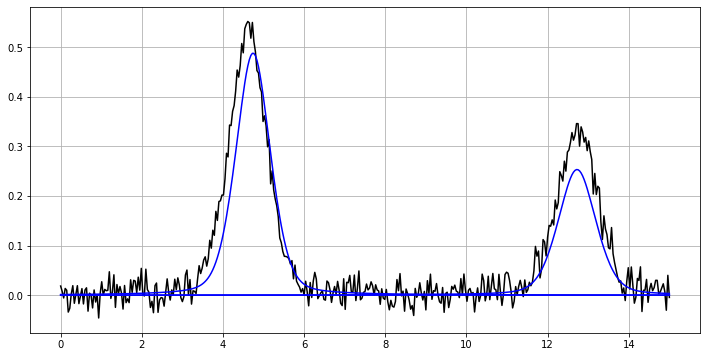

real_center   [ 0.          4.61549707 12.73793585]
predict_center [ 0.05057548 4.741714 12.724895 ]
---------------
real_width    [0.         1.11693444 1.17194019]
predict_center [ 0.005742401 1.0133867 1.1026528 ]
---------------
real_amp      [0.         0.53062024 0.33579517]
predict_center [ 0.008493438 0.487922 0.25323844 ]


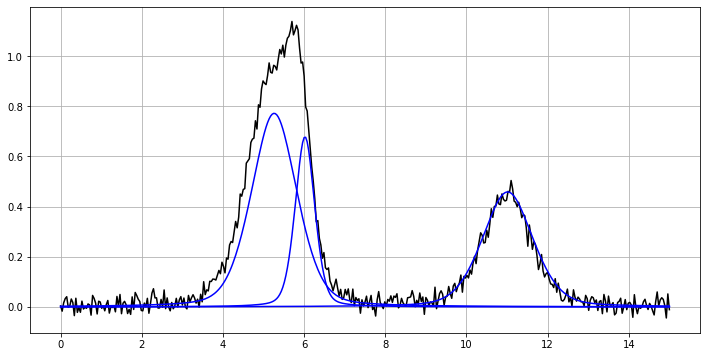

real_center   [ 5.12023748  5.84530511 10.99748078]
predict_center [ 5.2616286 6.0208335 11.014787 ]
---------------
real_width    [1.34057725 0.74437628 1.38113455]
predict_center [ 1.3380072 0.5741588 1.4870718 ]
---------------
real_amp      [0.84935913 0.70472954 0.46106577]
predict_center [ 0.7717139 0.6781173 0.4584046 ]


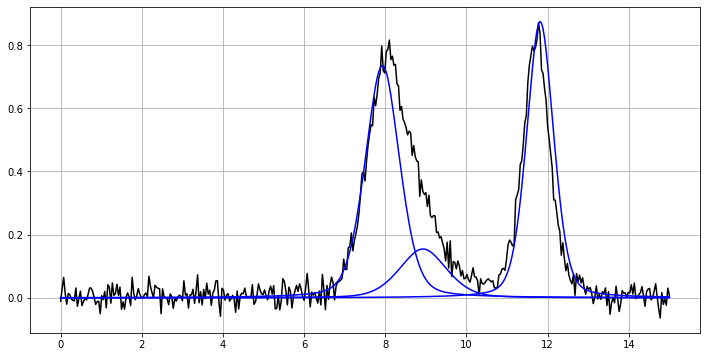

real_center   [ 8.0085005   8.9801749  11.72798113]
predict_center [ 7.92954 8.929334 11.816629 ]
---------------
real_width    [1.09531881 1.22843115 0.76551006]
predict_center [ 1.0101961 1.3840063 0.79048634 ]
---------------
real_amp      [0.71929417 0.23130514 0.83006498]
predict_center [ 0.73551697 0.15455678 0.87498695 ]


In [21]:
for i in range(30,50):

    plt.figure(figsize=(12,6))
    plt.plot(x,test_graph[i] ,color='black')
    plt.plot(x,y(prediction[1][i][0],prediction[2][i][0],prediction[3][i][0],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][1],prediction[2][i][1],prediction[3][i][1],x),color = 'blue')
    plt.plot(x,y(prediction[1][i][2],prediction[2][i][2],prediction[3][i][2],x),color = 'blue')
    plt.grid(True)
    plt.show()
    print('real_center  ',test_center[i])
    print('predict_center','[',prediction[1][i][0],prediction[1][i][1],prediction[1][i][2],']')
    print('---------------')
    print('real_width   ',test_width[i])
    print('predict_center','[',prediction[2][i][0],prediction[2][i][1],prediction[2][i][2],']')
    print('---------------')
    print('real_amp     ',test_amp[i])
    print('predict_center','[',prediction[3][i][0],prediction[3][i][1],prediction[3][i][2],']')
    
    

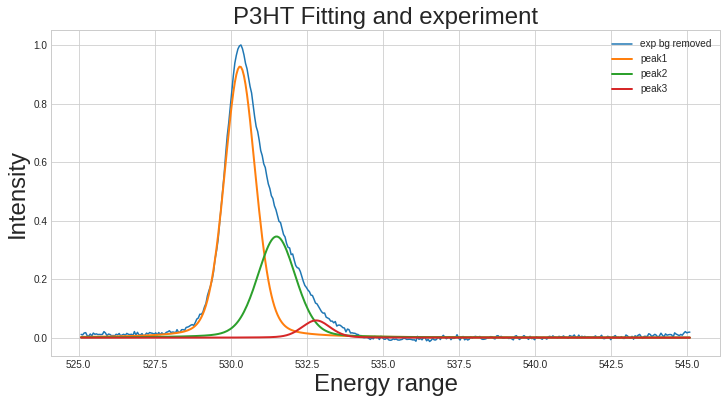

In [22]:
plt.style.use(["seaborn-whitegrid"])
plt.figure(figsize = (12, 6))

# only three peaks
bg = np.loadtxt("ITO_O1s_bg.txt")
exp = np.loadtxt("ITO_O1s_exp.txt")
fitting = np.loadtxt("ITO_O1s_fitting.txt")
peak1 = np.loadtxt("ITO_O1s_p1.txt")
peak2 = np.loadtxt("ITO_O1s_p2.txt")
peak3 = np.loadtxt("ITO_O1s_p3.txt")

# 테스트하고자 하는 실제 XPS 데이터의 parameter 범위가 너무 크므로 
# 네트워크 자체는 작은 규모의 파라미터 범위에서 학습시키고,
# 테스트할 경우, 범위를 줄인 xps 데이터를 불러와서 테스트해본다..

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

#plt.plot(fitting[:, 0], fitting[:, 1] - bg[:, 1], label = "fitting", linewidth = 2)

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)
plt.plot(peak3[:, 0], (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3', linewidth = 2)

plt.grid(True)
plt.title("P3HT Fitting and experiment", size = 24)
plt.xlabel("Energy range", size = 24)
plt.ylabel("Intensity", size = 24)
plt.legend()
plt.show()

(1, 401, 1)


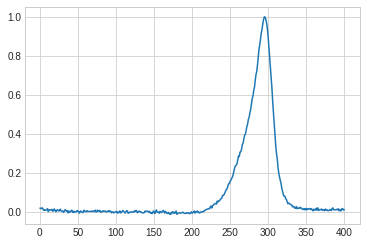

In [23]:
# normalize된 그래프의 y값

test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)
plt.plot(test_result[0])

In [24]:
predict = model.predict(test_result)
print(predict)

[array([[2.014676]], dtype=float32), array([[ 0.10478564, 10.135061  , 11.116089  ]], dtype=float32), array([[0.04499392, 1.4884706 , 0.7713804 ]], dtype=float32), array([[0.00196882, 0.37198514, 0.9419497 ]], dtype=float32)]


In [25]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [26]:
print(new_predict[0].shape)  # num_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


In [27]:
peak_1 = [new_predict[1][0], new_predict[2][0], new_predict[3][0]]
peak_2 = [new_predict[1][1], new_predict[2][1], new_predict[3][1]]
peak_3 = [new_predict[1][2], new_predict[2][2], new_predict[3][2]]

Text(0.5, 1.0, 'Network fitting vs real XPS graph')

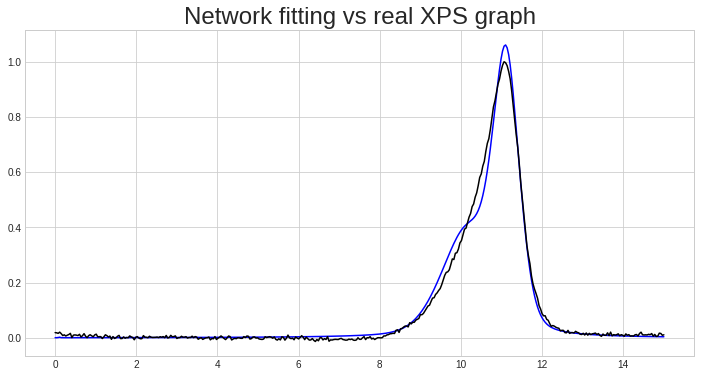

In [28]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
# plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
# plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed",color='black')
plt.title("Network fitting vs real XPS graph", size = 24)

Text(0.5, 1.0, 'Predict_peak1 vs Xps_peak1')

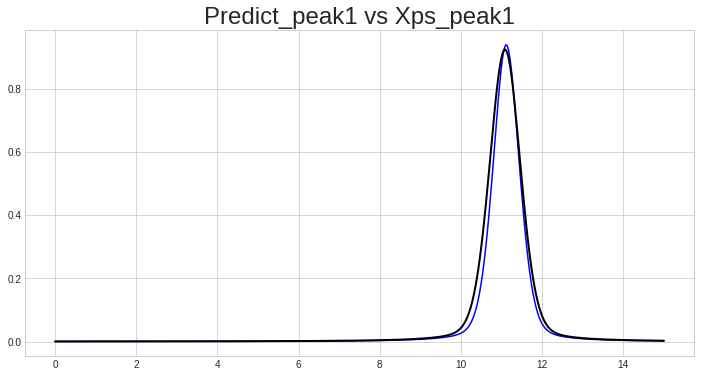

In [29]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color='blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2, color='black')
plt.title("Predict_peak1 vs Xps_peak1", size = 24)

Text(0.5, 1.0, 'Pre_peak2 vs Xps_peak2')

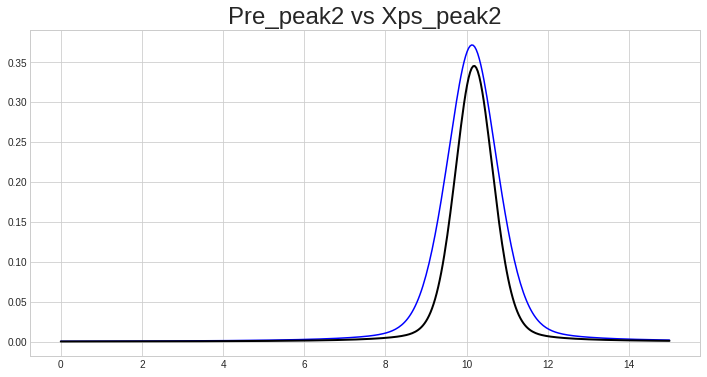

In [30]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color='blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)

Text(0.5, 1.0, 'Pre_peak3 vs Xps_peak3')

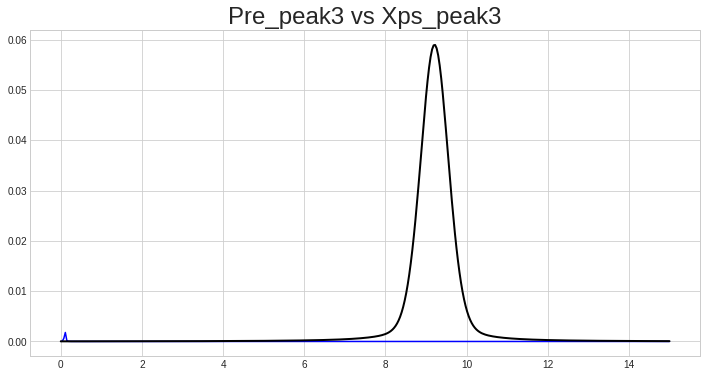

In [31]:
plt.figure(figsize = (12,6))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color='blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = 'peak3',color = 'black', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)

In [32]:
new_predict[1][0],new_predict[2][0],new_predict[3][0]

(0.104785636, 0.044993922, 0.001968816)

In [33]:
new_predict[0][0]

2.014676

In [34]:
# only two peak
bg = np.loadtxt("P3HT_S2p_bg.txt")
exp = np.loadtxt("P3HT_S2p_exp.txt")
fitting = np.loadtxt("P3HT_S2p_fitting.txt")
peak1 = np.loadtxt("P3HT_S2p_p1.txt")
peak2 = np.loadtxt("P3HT_S2p_p2.txt")

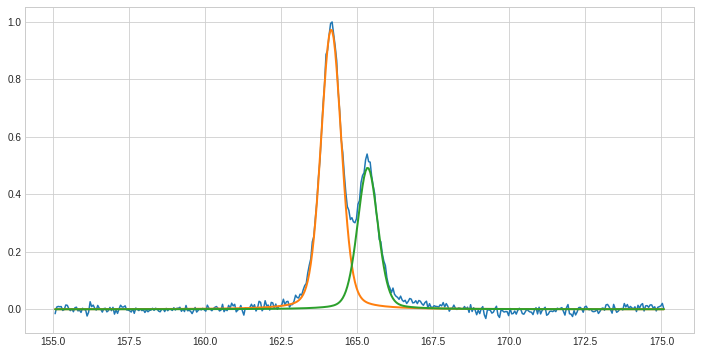

In [35]:
plt.figure(figsize = (12, 6))

# exp data에서 background를 제거하고, peak 높이를 1로 normalize한다.
plt.plot(exp[:, 0], (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()), label = "exp bg removed")

# 마찬가지로 개별 peak도 크기를 줄인다.
plt.plot(peak1[:, 0], (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak1", linewidth = 2)
plt.plot(peak2[:, 0], (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()), label = "peak2", linewidth = 2)

In [36]:
# normalize된 그래프의 y값
test_result = ((exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max())).reshape((1, 401, 1))
print(test_result.shape)

(1, 401, 1)


In [37]:
predict = model.predict(test_result)
print(predict)

[array([[2.0534654]], dtype=float32), array([[0.12362181, 7.1550765 , 8.00127   ]], dtype=float32), array([[0.03602217, 0.6357535 , 0.6635587 ]], dtype=float32), array([[-0.00655489,  0.5283371 ,  1.049545  ]], dtype=float32)]


In [38]:
new_predict = []

for element in predict:
    new_predict.append(element.reshape((element.shape[1])))

In [39]:
print(new_predict[0].shape)  #number_peak
print(new_predict[1].shape)  # center
print(new_predict[2].shape)  # width
print(new_predict[3].shape)  # amp

(1,)
(3,)
(3,)
(3,)


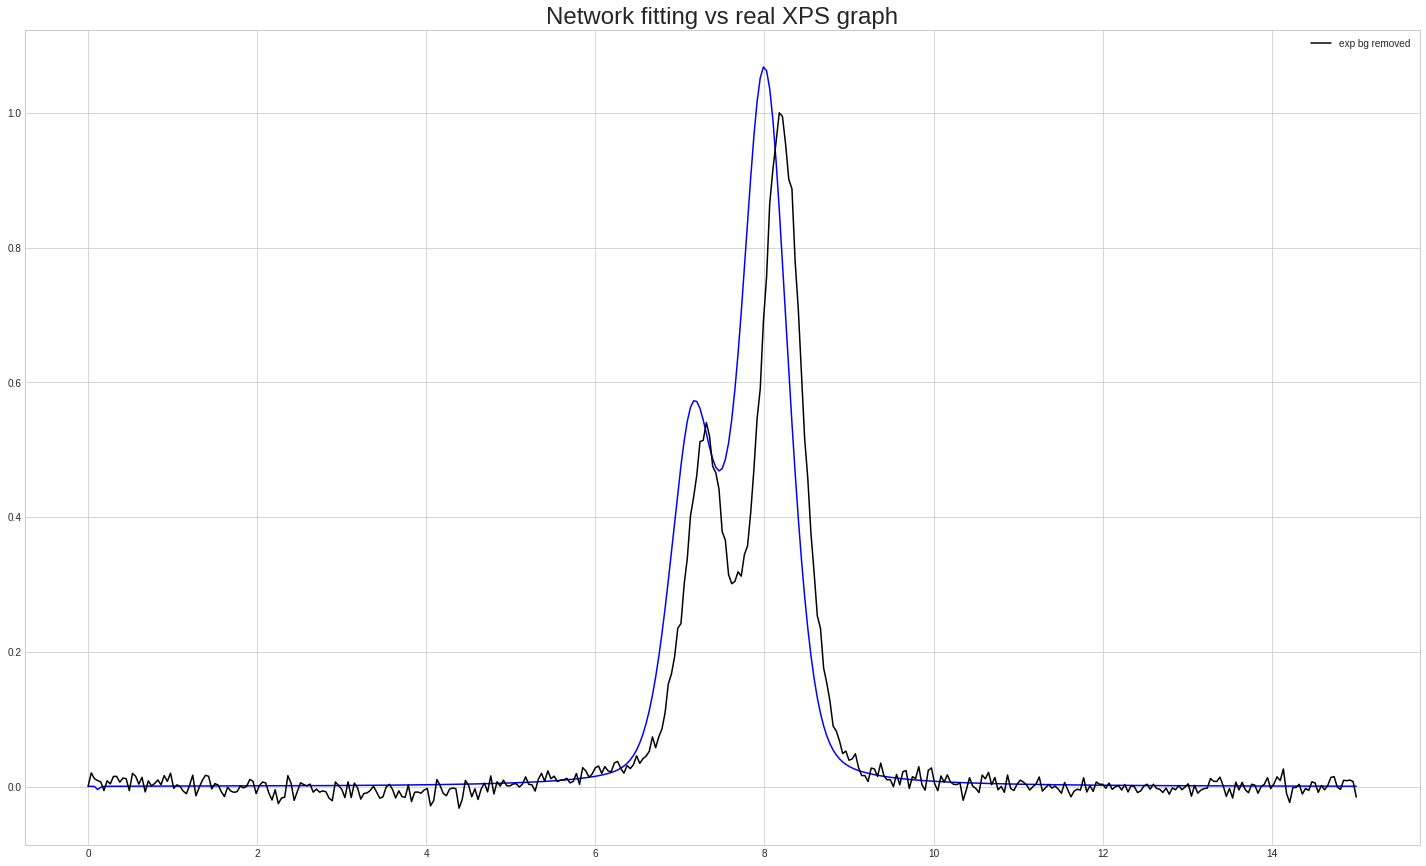

In [40]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x)+
         y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x)+
         y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (exp[:, 1] - bg[:, 1]) / ((exp[:, 1] - bg[:, 1]).max()),color = 'black', label = "exp bg removed")
plt.title("Network fitting vs real XPS graph", size = 24)
plt.legend()

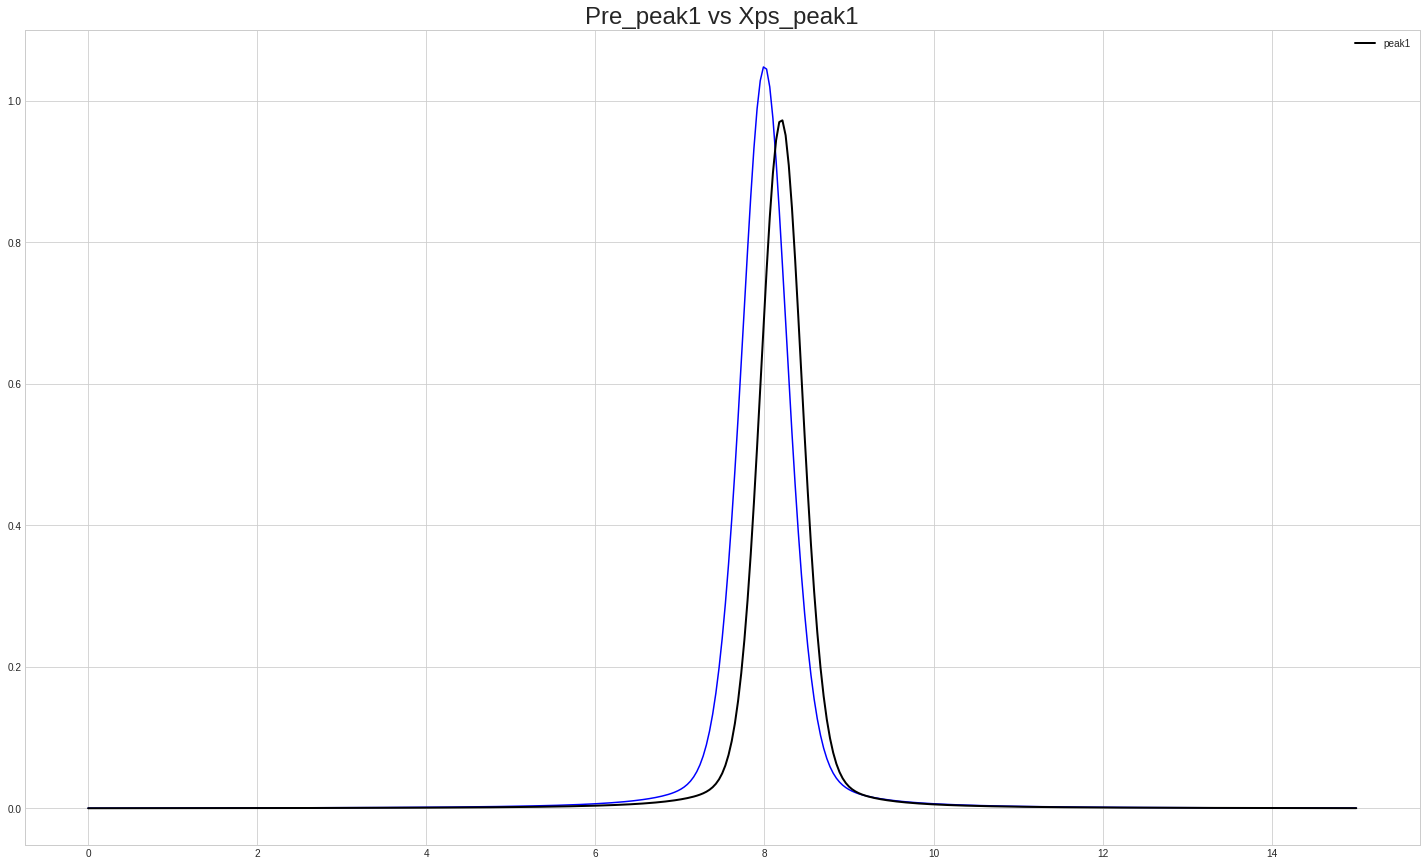

In [41]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][2],new_predict[2][2],new_predict[3][2],x),color = 'blue')
plt.plot(x, (peak1[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak1", linewidth = 2)
plt.title("Pre_peak1 vs Xps_peak1", size = 24)
plt.legend()

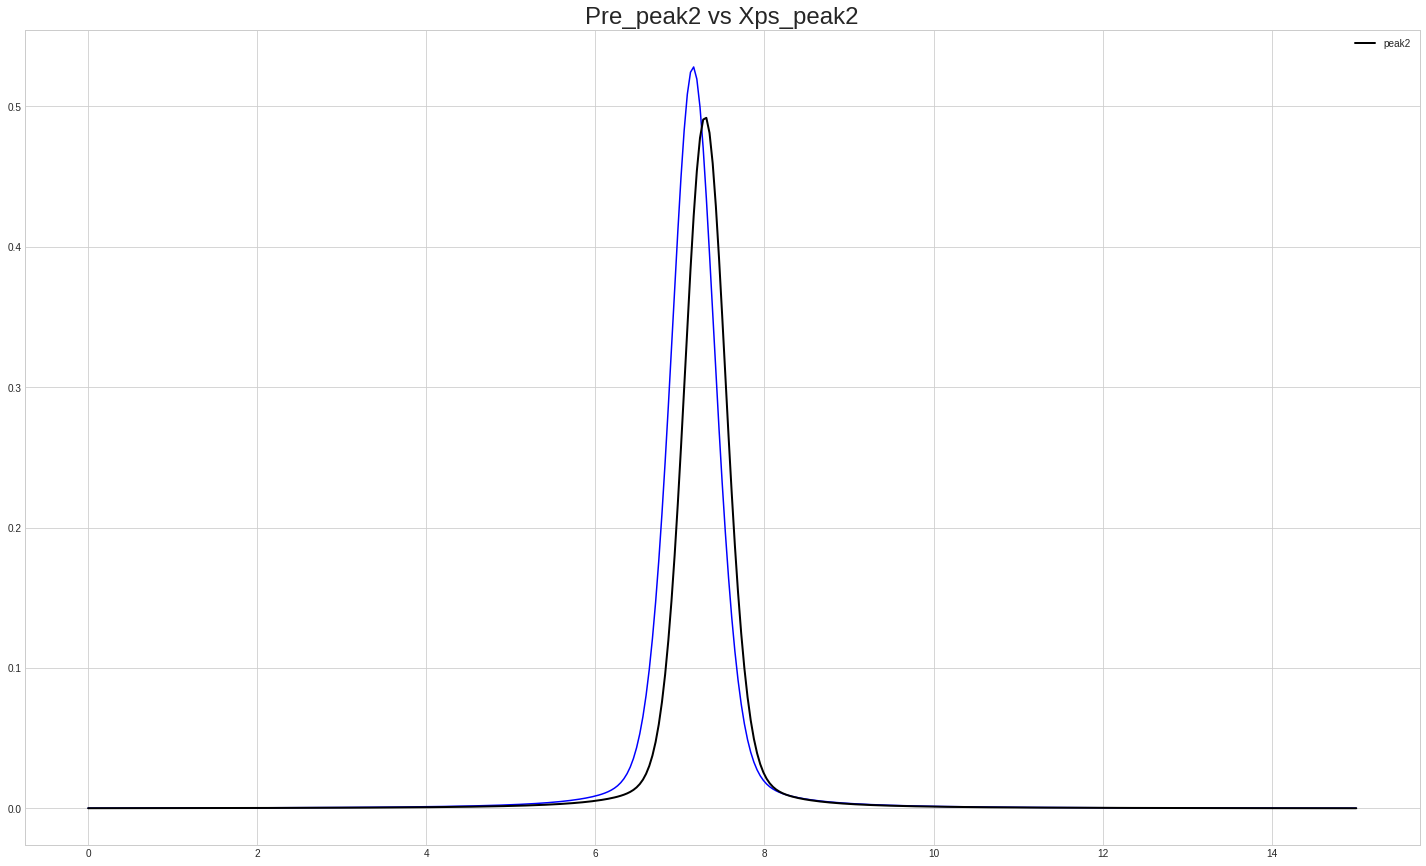

In [42]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][1],new_predict[2][1],new_predict[3][1],x),color = 'blue')
plt.plot(x, (peak2[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = "peak2", linewidth = 2)
plt.title("Pre_peak2 vs Xps_peak2", size = 24)
plt.legend()

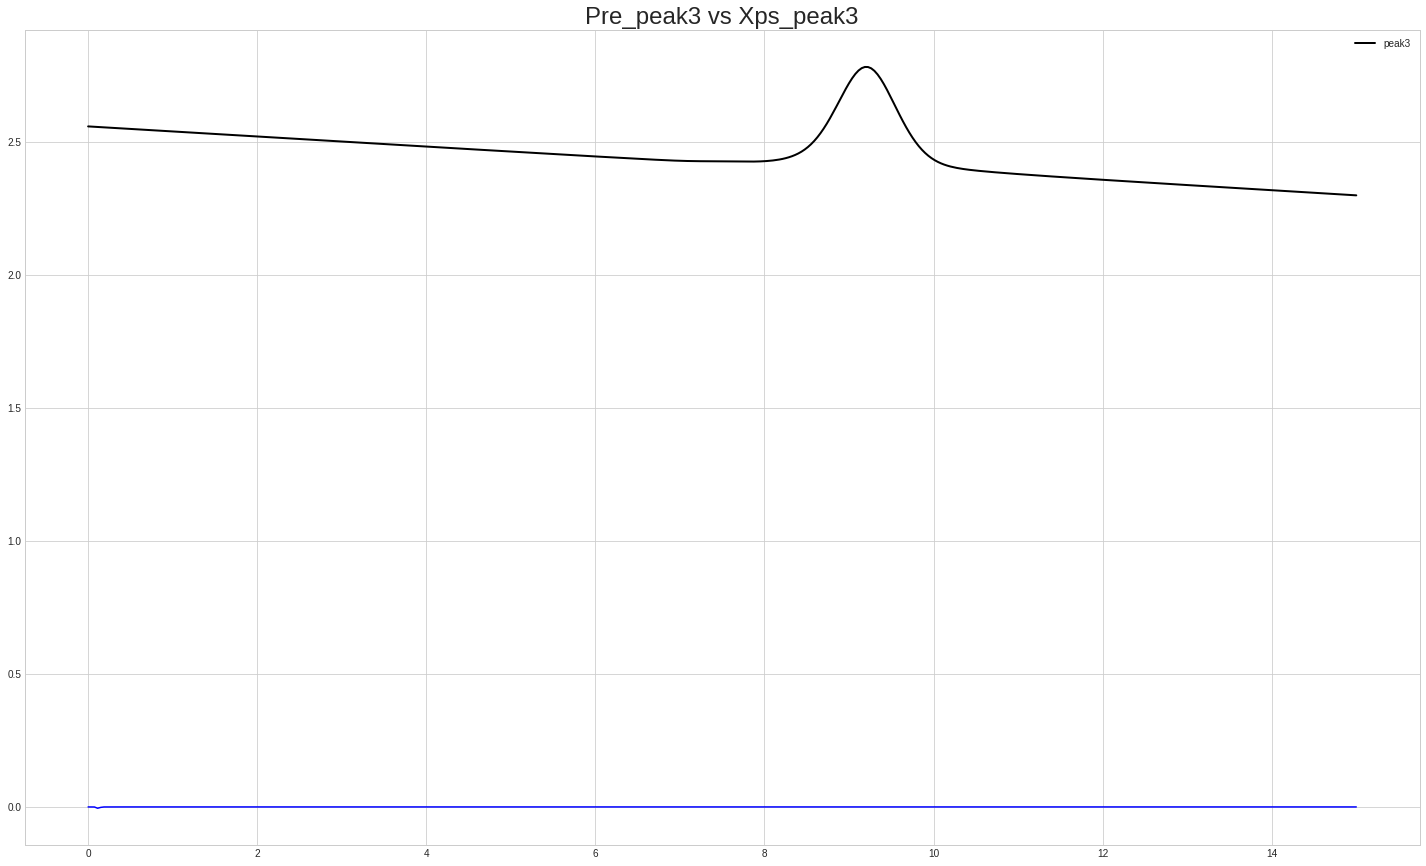

In [43]:
plt.figure(figsize = (25,15))
plt.plot(x,y(new_predict[1][0],new_predict[2][0],new_predict[3][0],x),color = 'blue')
plt.plot(x, (peak3[:, 1] - bg[:, 1])/ ((exp[:, 1] - bg[:, 1]).max()),color='black', label = 'peak3', linewidth = 2)
plt.title("Pre_peak3 vs Xps_peak3", size = 24)
plt.legend()

In [44]:
error_center_total=0
for i in range(test_center.shape[0]):
    error_center_total = error_center_total + (abs(prediction[1][i]-test_center[i]))
print('error_center_total = ',error_center_total)
error_center = error_center_total/test_center.shape[0]
print('error_center =  ',error_center)
print('\n')

error_width_total=0
for i in range(test_width.shape[0]):
    error_width_total = error_width_total + (abs(prediction[2][i]-test_width[i]))
print('error_width_total = ',error_width_total)
error_width = error_width_total/test_width.shape[0]
print('error_width =  ',error_width)
print('\n')

error_amp_total=0
for i in range(test_amp.shape[0]):
    error_amp_total = error_amp_total + (abs(prediction[3][i]-test_amp[i]))
print('error_amp_total = ',error_amp_total)
error_amp = error_amp_total/test_amp.shape[0]
print('error_amp =  ',error_amp)
print('\n')

error_peak_number_total=0
for i in range(test_peak_number.shape[0]):
    error_peak_number_total = error_peak_number_total + (abs(prediction[0][i]-test_peak_number[i]))
print('error_peak_number_total = ',error_peak_number_total)
error_peak_number = error_peak_number_total/test_peak_number.shape[0]
print('error_peak_number =  ',error_peak_number)
print('\n')


error_center_total =  [1993.89571369 3378.59337652 1873.80969879]
error_center =   [0.09969479 0.16892967 0.09369048]


error_width_total =  [1203.12390796 1853.91076558 1486.01579308]
error_width =   [0.0601562  0.09269554 0.07430079]


error_amp_total =  [ 972.38248691 1634.93037511 1398.39017387]
error_amp =   [0.04861912 0.08174652 0.06991951]


error_peak_number_total =  [203.41557]
error_peak_number =   [0.01017078]




In [45]:
# 바꾼거
# model10에서 epoches를 50->40으로 수정

# 이유
# center나 width, amp가 0.1이상으로 올라가
# 보통 가장 좋으면 cener=0.06까지 내려가는데
# 40epoches가 center=0.06에 최적인지 확인하려고

# 40에서 적절했어 이것만 확인해보고
# epoches는 데이터량에 비례할거야 나는 200만개니까 2000만개는 뭐 더 올려도 될거같아

In [46]:
#수정한거

# 0.모델7로 가져와서
# 1.교수님 global층 가져와보자
# 2. 데이터 200만개 새로운걸로 갱신해서 다시
# 3. 데이터량 늘려보기
# 4.교수님거랑 비교하기

In [ ]:
# 결과  

# model 7보다 안좋음- 너무 미비한거일지도
# 잔차모델을 해도 없는거랑 효과는 차이가 없다
# epoches 40이 적당한듯 물론 데이터 200만개에서